In [1]:
# Initialize the app
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import col, isnan, isnull, when, count, mean, trim, log10
from IPython.display import display
# pandas
import pandas as pd
import matplotlib.pyplot as plt

def display_null_values(df):
    print("----------------Null values----------------")
    df_to_pandas = df.toPandas()
    selected_null_values = df.select(
        [count(when(isnan(c) | isnull(c), c)).alias(c) for c in df.columns]
    ).toPandas()
    display(selected_null_values.transpose())
    print("----------------End----------------")
    
def display_total_number_rows(df):
    print("--->Total number of rows: %s" % df.count())
    
spark = SparkSession.builder.appName('xbai733_infosys722_iteration4').getOrCreate()

### 2.2.1

In [2]:
df_gdp_suicide = spark.read.csv(
    './Datasets/GDP Suicide.csv',
    header='true'
)

df_gdp_suicide.select(
    "Country",
    "Country Code",
    "GDP_PerCapita_2000 US$",
    "SuicideRate_2000"
).show()

df_gdp_suicide.select(
    "GDP_PerCapita_2005 US$",
    "SuicideRate_2005",
    "GDP_PerCapita_2010 US$",
    "SuicideRate_2010"
).show()

df_gdp_suicide.select(
    "GDP_PerCapita_2015 US$",
    "SuicideRate_2015",
    "GDP_PerCapita_2016 US$",
    "SuicideRate_2016"
).show()

df_gdp_suicide.printSchema()
display_total_number_rows(df_gdp_suicide)

+--------------------+------------+----------------------+----------------+
|             Country|Country Code|GDP_PerCapita_2000 US$|SuicideRate_2000|
+--------------------+------------+----------------------+----------------+
|         Afghanistan|         AFG|                  null|             5.7|
|              Angola|         AGO|           556.8363181|             7.9|
|             Albania|         ALB|           1126.683318|             5.5|
|United Arab Emirates|         ARE|           33291.41937|             3.2|
|           Argentina|         ARG|           7708.100996|             9.5|
|             Armenia|         ARM|           622.7421391|             3.3|
| Antigua and Barbuda|         ATG|           10920.84269|               2|
|           Australia|         AUS|           21679.24784|            13.2|
|             Austria|         AUT|           24564.45829|              20|
|          Azerbaijan|         AZE|           655.0974326|             2.2|
|           

### 2.2.2

In [3]:
df_age_standard_suicide_rate = spark.read.csv(
    './Datasets/Age-standardized suicide rates.csv',
    header='true'
)

df_age_standard_suicide_rate.select(
    "Country",
    "Sex",
    " 80_above",
    " 70to79",
    " 60to69 ",
    " 50to59 ",
    " 40to49",
    " 30to39",
    " 20to29",
    " 10to19"
).show()

df_age_standard_suicide_rate.printSchema()
display_total_number_rows(df_age_standard_suicide_rate)

## Update column Sex to 1 and 0.
df_filtered_sex = df_age_standard_suicide_rate.filter(df_age_standard_suicide_rate.Sex != ' Both sexes')
df_filtered_sex = df_filtered_sex.withColumn(
    "Sex",
    when(df_filtered_sex.Sex == " Male", 1).when(df_filtered_sex.Sex == " Female", 0).otherwise(col("Sex"))
)
df_filtered_sex.printSchema()
df_filtered_sex.show()


+-------------------+-----------+---------+-------+--------+--------+-------+-------+-------+-------+
|            Country|        Sex| 80_above| 70to79| 60to69 | 50to59 | 40to49| 30to39| 20to29| 10to19|
+-------------------+-----------+---------+-------+--------+--------+-------+-------+-------+-------+
|        Afghanistan| Both sexes|       42|     11|     5.5|     5.6|    6.6|    9.2|   10.2|    3.1|
|        Afghanistan|       Male|     70.4|   20.9|     9.8|     9.3|   10.5|   15.1|   16.3|    4.8|
|        Afghanistan|     Female|     20.1|    2.3|     1.4|     1.6|    2.3|    2.7|    3.5|    1.2|
|            Albania| Both sexes|     16.3|    8.3|       6|     7.8|    9.1|    6.1|    6.5|      5|
|            Albania|       Male|     23.2|   11.9|     8.1|    11.4|   13.5|    8.8|    6.3|    3.1|
|            Albania|     Female|     10.9|    4.9|     3.9|     4.4|      5|    3.4|    6.6|      7|
|            Algeria| Both sexes|      9.4|    5.6|     4.2|     4.1|    4.7|    5

### 2.2.3

In [4]:
df_crude_suicide_rate = spark.read.csv(
    './Datasets/Crude suicide rates.csv',
    header='true'
)
df_crude_suicide_rate.select(
    "Country",
    "Sex",
    "2016",
    "2015",
    "2010",
    "2000"
).show()
df_crude_suicide_rate.printSchema()
display_total_number_rows(df_crude_suicide_rate)

+-------------------+-----------+----+----+----+----+
|            Country|        Sex|2016|2015|2010|2000|
+-------------------+-----------+----+----+----+----+
|        Afghanistan| Both sexes| 6.4| 6.6| 7.4| 8.1|
|        Afghanistan|       Male|10.6|10.9|12.5|14.3|
|        Afghanistan|     Female| 2.1| 2.1| 2.1| 1.7|
|            Albania| Both sexes| 5.6| 5.3| 7.7| 5.8|
|            Albania|       Male|   7| 6.7| 9.5| 8.2|
|            Albania|     Female| 4.3|   4|   6| 3.6|
|            Algeria| Both sexes| 3.3| 3.4| 3.5| 4.7|
|            Algeria|       Male| 4.9|   5| 5.1| 6.7|
|            Algeria|     Female| 1.8| 1.8| 1.9| 2.8|
|             Angola| Both sexes| 8.9| 9.3|10.4|13.9|
|             Angola|       Male|  14|14.8|16.7|21.9|
|             Angola|     Female| 4.6| 4.7| 5.1| 7.2|
|Antigua and Barbuda| Both sexes| 0.5| 0.8| 0.2| 2.1|
|Antigua and Barbuda|       Male|   0|   0| 0.5| 4.3|
|Antigua and Barbuda|     Female| 0.9| 1.6|   0| 0.1|
|          Argentina| Both s

### 2.2.4

In [5]:
df_facilities = spark.read.csv(
    './Datasets/Facilities.csv',
    header='true'
)
df_facilities.select(
    "Country",
    "Year",
    "Mental _hospitals",
    "health_units"
).show()
df_facilities.select(
    "outpatient _facilities",
    "day _treatment",
    "residential_facilities"
).show()
df_facilities.printSchema()
display_total_number_rows(df_facilities)

+--------------------+----+-----------------+------------+
|             Country|Year|Mental _hospitals|health_units|
+--------------------+----+-----------------+------------+
|         Afghanistan|2016|            0.003|       0.012|
|             Albania|2016|            0.068|       0.068|
|             Algeria|2016|            0.048|       0.068|
|              Angola|2016|            0.011|        null|
| Antigua and Barbuda|2016|            1.001|        null|
|           Argentina|2016|            0.937|       1.071|
|             Armenia|2016|             null|       0.069|
|          Azerbaijan|2016|            0.114|       0.021|
|          Bangladesh|2016|            0.001|       0.035|
|             Belarus|2016|              0.2|       0.063|
|              Belize|2016|             null|       1.948|
|              Bhutan|2016|             null|       0.127|
|Bolivia (Plurinat...|2016|            0.075|       0.009|
|              Brazil|2016|            0.069|       0.11

### 2.2.5

In [6]:
df_human_resources = spark.read.csv(
    './Datasets/Human Resources.csv', 
    header='true'
)
df_human_resources.select(
    "Country",
    "Year",
    "Psychiatrists",
    "Nurses",
    "Social_workers",
    "Psychologists"
).show()
df_human_resources.printSchema()
display_total_number_rows(df_human_resources)

+--------------------+----+-------------+------+--------------+-------------+
|             Country|Year|Psychiatrists|Nurses|Social_workers|Psychologists|
+--------------------+----+-------------+------+--------------+-------------+
|         Afghanistan|2016|        0.231| 0.098|          null|        0.296|
|             Albania|2016|        1.471| 6.876|          1.06|        1.231|
|              Angola|2016|        0.057|  0.66|         0.022|        0.179|
| Antigua and Barbuda|2016|        1.001| 7.005|         4.003|         null|
|           Argentina|2016|       21.705|  null|          null|      222.572|
|             Armenia|2016|         3.84|11.245|         0.274|        0.788|
|          Azerbaijan|2016|        3.452| 6.717|         0.114|        1.165|
|          Bangladesh|2016|         0.13| 0.873|          null|        0.124|
|             Belarus|2016|       13.504|  null|          null|        5.514|
|              Belize|2016|        1.392|  3.34|          null| 

### 2.2.6

In [7]:
df_integrated = df_gdp_suicide \
    .join(df_age_standard_suicide_rate, ["Country"]) \
    .join(df_crude_suicide_rate, ["Country"]) \
    .join(df_facilities, ["Country"]) \
    .join(df_human_resources, ["Country"])

# df_integrated.show()

df_integrated.select(
    "Country",
    "Country Code",
    "GDP_PerCapita_2000 US$",
    "SuicideRate_2000"
).show()

df_integrated.select(
    "GDP_PerCapita_2005 US$",
    "SuicideRate_2005",
    "GDP_PerCapita_2010 US$",
    "SuicideRate_2010"
).show()

df_integrated.select(
    "GDP_PerCapita_2015 US$",
    "SuicideRate_2015",
    "GDP_PerCapita_2016 US$",
    "SuicideRate_2016"
).show()

df_integrated.select(
#     "Sex",
    " 70to79",
    " 60to69 ",
    " 50to59 ",
    " 40to49",
    " 30to39",
    " 20to29",
    " 10to19"
).show()

df_integrated.select(
#     "Sex",
    "2016",
    "2015",
    "2010",
    "2000"
).show()

df_integrated.select(
#     "Year",
    "Mental _hospitals",
    "health_units"
).show()

df_integrated.select(
    "outpatient _facilities",
    "day _treatment",
    "residential_facilities"
).show()

df_integrated.printSchema()
display_total_number_rows(df_integrated)

+-----------+------------+----------------------+----------------+
|    Country|Country Code|GDP_PerCapita_2000 US$|SuicideRate_2000|
+-----------+------------+----------------------+----------------+
|Afghanistan|         AFG|                  null|             5.7|
|Afghanistan|         AFG|                  null|             5.7|
|Afghanistan|         AFG|                  null|             5.7|
|Afghanistan|         AFG|                  null|             5.7|
|Afghanistan|         AFG|                  null|             5.7|
|Afghanistan|         AFG|                  null|             5.7|
|Afghanistan|         AFG|                  null|             5.7|
|Afghanistan|         AFG|                  null|             5.7|
|Afghanistan|         AFG|                  null|             5.7|
|     Angola|         AGO|           556.8363181|             7.9|
|     Angola|         AGO|           556.8363181|             7.9|
|     Angola|         AGO|           556.8363181|             

--->Total number of rows: 837


### 2.3.1

+--------------------+----------------------+----------------------+----------------------+
|             Country|GDP_PerCapita_2000 US$|GDP_PerCapita_2005 US$|GDP_PerCapita_2010 US$|
+--------------------+----------------------+----------------------+----------------------+
|         Afghanistan|                  null|           242.0313792|           543.3030419|
|              Angola|           556.8363181|           1902.422346|           3587.883798|
|             Albania|           1126.683318|           2673.787283|           4094.358816|
|United Arab Emirates|           33291.41937|           39365.33592|           33893.30351|
|           Argentina|           7708.100996|           5109.851325|           10385.96443|
|             Armenia|           622.7421391|           1643.753029|           3218.372707|
| Antigua and Barbuda|           10920.84269|           12547.61304|           13092.07382|
|           Australia|           21679.24784|           33999.24286|            

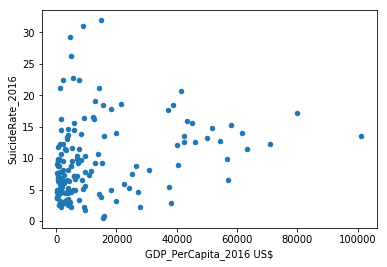

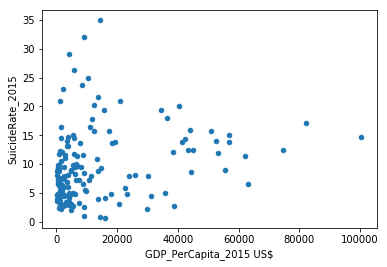

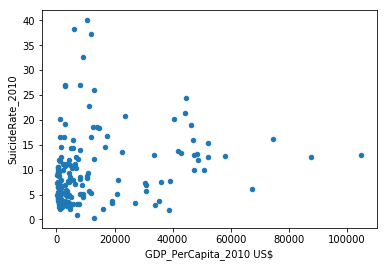

In [8]:
df_gdp_suicide.select(
    "Country",
    "GDP_PerCapita_2000 US$",
    "GDP_PerCapita_2005 US$",
    "GDP_PerCapita_2010 US$",
).show()

df_gdp_suicide.select(
    "Country",
    "GDP_PerCapita_2015 US$",
    "GDP_PerCapita_2016 US$"
).show()

df_gdp_suicide.select(
    "Country",
    "SuicideRate_2000",
    "SuicideRate_2005",
    "SuicideRate_2010",
    "SuicideRate_2015",
    "SuicideRate_2016"
).show()

df_gdp_suicide = df_gdp_suicide.withColumn(
    "GDP_PerCapita_2016 US$",
    col("GDP_PerCapita_2016 US$").cast("float")
).withColumn(
    "SuicideRate_2016",
    col("SuicideRate_2016").cast("float")
).withColumn(
    "GDP_PerCapita_2015 US$",
    col("GDP_PerCapita_2015 US$").cast("float")
).withColumn(
    "SuicideRate_2015",
    col("SuicideRate_2015").cast("float")
).withColumn(
    "GDP_PerCapita_2010 US$",
    col("GDP_PerCapita_2010 US$").cast("float")
).withColumn(
    "SuicideRate_2010",
    col("SuicideRate_2010").cast("float")
).withColumn(
    "GDP_PerCapita_2005 US$",
    col("GDP_PerCapita_2005 US$").cast("float")
).withColumn(
    "SuicideRate_2005",
    col("SuicideRate_2005").cast("float")
).withColumn(
    "GDP_PerCapita_2000 US$",
    col("GDP_PerCapita_2000 US$").cast("float")
).withColumn(
    "SuicideRate_2000",
    col("SuicideRate_2000").cast("float")
)

df_gdp_suicide.show()
df_gdp_suicide.printSchema()

df_gdp_suicide_pandas = df_gdp_suicide.toPandas()
print(df_gdp_suicide_pandas.describe())
df_gdp_suicide_pandas.plot(
    kind="scatter",
    x="GDP_PerCapita_2016 US$",
    y="SuicideRate_2016",
)

df_gdp_suicide_pandas.plot(
    kind="scatter",
    x="GDP_PerCapita_2015 US$",
    y="SuicideRate_2015",
)

df_gdp_suicide_pandas.plot(
    kind="scatter",
    x="GDP_PerCapita_2010 US$",
    y="SuicideRate_2010",
)

### 2.3.2

+-------------------+-----------+---------+-------+--------+--------+-------+-------+-------+-------+
|            Country|        Sex| 80_above| 70to79| 60to69 | 50to59 | 40to49| 30to39| 20to29| 10to19|
+-------------------+-----------+---------+-------+--------+--------+-------+-------+-------+-------+
|        Afghanistan| Both sexes|     42.0|   11.0|     5.5|     5.6|    6.6|    9.2|   10.2|    3.1|
|        Afghanistan|       Male|     70.4|   20.9|     9.8|     9.3|   10.5|   15.1|   16.3|    4.8|
|        Afghanistan|     Female|     20.1|    2.3|     1.4|     1.6|    2.3|    2.7|    3.5|    1.2|
|            Albania| Both sexes|     16.3|    8.3|     6.0|     7.8|    9.1|    6.1|    6.5|    5.0|
|            Albania|       Male|     23.2|   11.9|     8.1|    11.4|   13.5|    8.8|    6.3|    3.1|
|            Albania|     Female|     10.9|    4.9|     3.9|     4.4|    5.0|    3.4|    6.6|    7.0|
|            Algeria| Both sexes|      9.4|    5.6|     4.2|     4.1|    4.7|    5

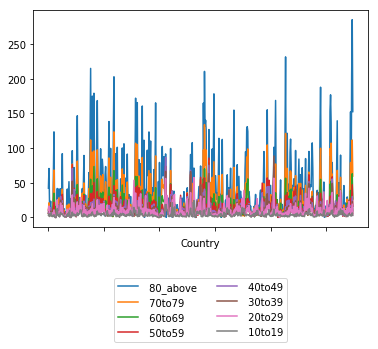

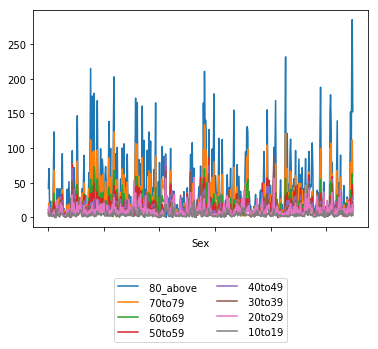

[42.585428065506704, 25.936794180144812, 17.439162152061044, 14.74335153745606, 12.189435374812785, 10.895446278548414, 10.423315112979468, 4.075045544050213]


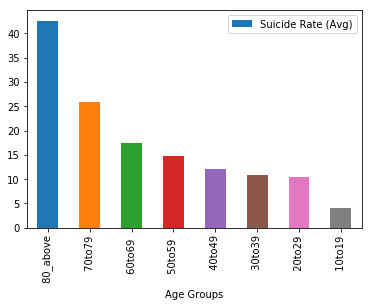

In [9]:
df_aged_suicide = spark.read.csv(
    './Datasets/Age-standardized suicide rates.csv', 
    header='true'
)
df_aged_suicide = df_aged_suicide.withColumn(
    " 80_above",
    col(" 80_above").cast("float")
).withColumn(
    " 70to79",
    col(" 70to79").cast("float")
).withColumn(
    " 60to69 ",
    col(" 60to69 ").cast("float")
).withColumn(
    " 50to59 ",
    col(" 50to59 ").cast("float")
).withColumn(
    " 40to49",
    col(" 40to49").cast("float")
).withColumn(
    " 30to39",
    col(" 30to39").cast("float")
).withColumn(
    " 20to29",
    col(" 20to29").cast("float")
).withColumn(
    " 10to19",
    col(" 10to19").cast("float")
)
df_aged_suicide.show()
df_aged_suicide.printSchema()

df_aged_suicide_pandas = df_aged_suicide.toPandas()
print(df_aged_suicide_pandas.describe())
age_groups = [
    " 80_above",
    " 70to79",
    " 60to69 ",
    " 50to59 ",
    " 40to49",
    " 30to39",
    " 20to29",
    " 10to19"
]

df_aged_suicide_pandas.plot(
    kind="line",
    x="Country",
    y=age_groups
)
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.55),
    ncol=2
)
plt.show()
df_aged_suicide_pandas.plot(
    kind="line",
    x="Sex",
    y=age_groups
)
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.55),
    ncol=2
)
plt.show()

# average suicide rate per age group
age_groups_values = [
    sum(df_aged_suicide_pandas.loc[:," 80_above"].values) / len(df_aged_suicide_pandas.loc[:," 80_above"].values),
    sum(df_aged_suicide_pandas.loc[:," 70to79"].values) / len(df_aged_suicide_pandas.loc[:," 70to79"].values),
    sum(df_aged_suicide_pandas.loc[:," 60to69 "].values) / len(df_aged_suicide_pandas.loc[:," 60to69 "].values),
    sum(df_aged_suicide_pandas.loc[:," 50to59 "].values) / len(df_aged_suicide_pandas.loc[:," 50to59 "].values),
    sum(df_aged_suicide_pandas.loc[:," 40to49"].values) / len(df_aged_suicide_pandas.loc[:," 40to49"].values),
    sum(df_aged_suicide_pandas.loc[:," 30to39"].values) / len(df_aged_suicide_pandas.loc[:," 30to39"].values),
    sum(df_aged_suicide_pandas.loc[:," 20to29"].values) / len(df_aged_suicide_pandas.loc[:," 20to29"].values),
    sum(df_aged_suicide_pandas.loc[:," 10to19"].values) / len(df_aged_suicide_pandas.loc[:," 10to19"].values)
]
print(age_groups_values)
df_aged_suicde_plot = pd.DataFrame({"Age Groups": age_groups, "Suicide Rate (Avg)": age_groups_values})
df_aged_suicde_plot.plot.bar(x="Age Groups", y="Suicide Rate (Avg)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
Country      183 non-null object
Sex          183 non-null object
 80_above    183 non-null float64
 70to79      183 non-null float64
 60to69      183 non-null float64
 50to59      183 non-null float64
 40to49      183 non-null float64
 30to39      183 non-null float64
 20to29      183 non-null float64
 10to19      183 non-null float64
dtypes: float64(8), object(2)
memory usage: 14.4+ KB
         80_above      70to79     60to69      50to59       40to49      30to39  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean    64.504372   37.505464   25.271038   22.149727   18.786339   16.801093   
std     53.640520   28.339366   16.239796   15.635315   13.917073   12.871551   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     23.050000   14.200000   12.150000   10.600000    9.900000    8.350000   
50%     44.400002 

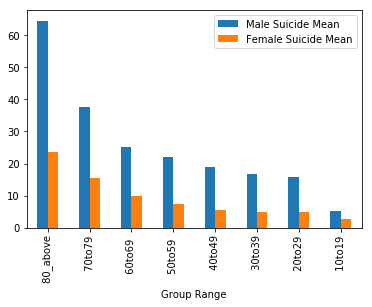

In [10]:
df_suicide_rate_age = spark.read.csv('./Datasets/Age-standardized suicide rates.csv', header='true')
# Only consider group age range in ralated to male
df_males_suicide = df_suicide_rate_age.filter(df_suicide_rate_age.Sex == ' Male')
df_males_suicide = df_males_suicide.withColumn(
    " 80_above",
    col(" 80_above").cast("float")
).withColumn(
    " 70to79",
    col(" 70to79").cast("float")
).withColumn(
    " 60to69 ",
    col(" 60to69 ").cast("float")
).withColumn(
    " 50to59 ",
    col(" 50to59 ").cast("float")
).withColumn(
    " 40to49",
    col(" 40to49").cast("float")
).withColumn(
    " 30to39",
    col(" 30to39").cast("float")
).withColumn(
    " 20to29",
    col(" 20to29").cast("float")
).withColumn(
    " 10to19",
    col(" 10to19").cast("float")
)
df_males_pandas = df_males_suicide.toPandas()
df_males_pandas.info()
df_males_pandas.head()

print(df_males_pandas.describe())
df_males_pandas = df_males_pandas.mean().reset_index()
df_males_pandas.columns = ['Group Range', 'Male Suicide Mean']

# Only consider group age range in ralated to female
df_females_suicide = df_suicide_rate_age.filter(df_suicide_rate_age.Sex == ' Female')
df_females_suicide = df_females_suicide.withColumn(
    " 80_above",
    col(" 80_above").cast("float")
).withColumn(
    " 70to79",
    col(" 70to79").cast("float")
).withColumn(
    " 60to69 ",
    col(" 60to69 ").cast("float")
).withColumn(
    " 50to59 ",
    col(" 50to59 ").cast("float")
).withColumn(
    " 40to49",
    col(" 40to49").cast("float")
).withColumn(
    " 30to39",
    col(" 30to39").cast("float")
).withColumn(
    " 20to29",
    col(" 20to29").cast("float")
).withColumn(
    " 10to19",
    col(" 10to19").cast("float")
)
df_females_pandas = df_females_suicide.toPandas()
df_females_pandas.info()
df_females_pandas.head()
print(df_females_pandas.describe())
df_females_pandas = df_females_pandas.mean().reset_index()
df_females_pandas.columns = ['Group Range', 'Female Suicide Mean']

both_gender_groups = df_males_pandas.set_index('Group Range').join(df_females_pandas.set_index('Group Range'))
both_gender_groups.reset_index(inplace=True)
both_gender_groups.plot(x="Group Range", y=None, kind="bar")

### 2.3.3

+-------------------+-----------+----+----+----+----+
|            Country|        Sex|2016|2015|2010|2000|
+-------------------+-----------+----+----+----+----+
|        Afghanistan| Both sexes| 6.4| 6.6| 7.4| 8.1|
|        Afghanistan|       Male|10.6|10.9|12.5|14.3|
|        Afghanistan|     Female| 2.1| 2.1| 2.1| 1.7|
|            Albania| Both sexes| 5.6| 5.3| 7.7| 5.8|
|            Albania|       Male| 7.0| 6.7| 9.5| 8.2|
|            Albania|     Female| 4.3| 4.0| 6.0| 3.6|
|            Algeria| Both sexes| 3.3| 3.4| 3.5| 4.7|
|            Algeria|       Male| 4.9| 5.0| 5.1| 6.7|
|            Algeria|     Female| 1.8| 1.8| 1.9| 2.8|
|             Angola| Both sexes| 8.9| 9.3|10.4|13.9|
|             Angola|       Male|14.0|14.8|16.7|21.9|
|             Angola|     Female| 4.6| 4.7| 5.1| 7.2|
|Antigua and Barbuda| Both sexes| 0.5| 0.8| 0.2| 2.1|
|Antigua and Barbuda|       Male| 0.0| 0.0| 0.5| 4.3|
|Antigua and Barbuda|     Female| 0.9| 1.6| 0.0| 0.1|
|          Argentina| Both s

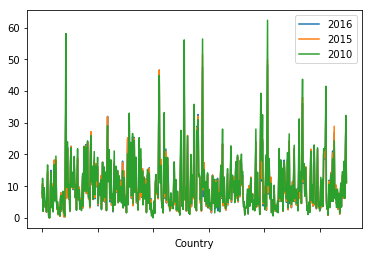

In [11]:
df_crude_suicide_rates = spark.read.csv('./Datasets/Crude suicide rates.csv', header='true')
df_crude_suicide_rates = df_crude_suicide_rates.withColumn(
    "2016",
    col("2016").cast("float")
).withColumn(
    "2015",
    col("2015").cast("float")
).withColumn(
    "2010",
    col("2010").cast("float")
)
df_crude_suicide_rates.show()
df_crude_suicide_rates.printSchema()

df_crude_suicide_rates_pandas = df_crude_suicide_rates.toPandas()
print(df_crude_suicide_rates_pandas.describe())
df_crude_suicide_rates_pandas.plot(kind="line", x="Country", y=["2016", "2015", "2010"])

### 2.3.4

+--------------------+-----------------+------------+----------------------+
|             Country|Mental _hospitals|health_units|outpatient _facilities|
+--------------------+-----------------+------------+----------------------+
|         Afghanistan|            0.003|       0.012|                 0.006|
|             Albania|            0.068|       0.068|                  0.41|
|             Algeria|            0.048|       0.068|                 0.048|
|              Angola|            0.011|        null|                  null|
| Antigua and Barbuda|            1.001|        null|                  null|
|           Argentina|            0.937|       1.071|                  1.72|
|             Armenia|             null|       0.069|                 1.371|
|          Azerbaijan|            0.114|       0.021|                 0.156|
|          Bangladesh|            0.001|       0.035|                 0.055|
|             Belarus|              0.2|       0.063|                 0.116|

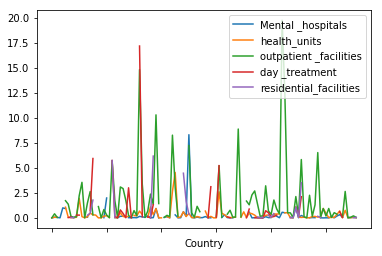

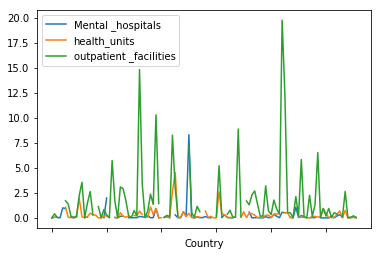

In [12]:
df_facilities = spark.read.csv(
    './Datasets/Facilities.csv', 
    header='true'
)
df_facilities = df_facilities.withColumn(
    "Mental _hospitals",
    col("Mental _hospitals").cast("float")
).withColumn(
    "health_units",
    col("health_units").cast("float")
).withColumn(
    "outpatient _facilities",
    col("outpatient _facilities").cast("float")
).withColumn(
    "day _treatment",
    col("day _treatment").cast("float")
).withColumn(
    "residential_facilities",
    col("residential_facilities").cast("float")
)
df_facilities.select(
    "Country",
    "Mental _hospitals",
    "health_units",
    "outpatient _facilities"
).show()
df_facilities.select(
    "Country",
    "day _treatment",
    "residential_facilities"
).show()
df_facilities.printSchema()

df_facilities_pandas = df_facilities.toPandas()
print(df_facilities_pandas.describe())
df_facilities_pandas.plot(
    kind="line",
    x="Country",
    y=[
        "Mental _hospitals",
        "health_units",
        "outpatient _facilities",
        "day _treatment",
        "residential_facilities"
    ]
)

df_facilities_pandas.plot(
    kind="line",
    x="Country",
    y=[
        "Mental _hospitals",
        "health_units",
        "outpatient _facilities"
    ]
)

### 2.3.5

+--------------------+----+-------------+------+--------------+-------------+
|             Country|Year|Psychiatrists|Nurses|Social_workers|Psychologists|
+--------------------+----+-------------+------+--------------+-------------+
|         Afghanistan|2016|        0.231| 0.098|          null|        0.296|
|             Albania|2016|        1.471| 6.876|          1.06|        1.231|
|              Angola|2016|        0.057|  0.66|         0.022|        0.179|
| Antigua and Barbuda|2016|        1.001| 7.005|         4.003|         null|
|           Argentina|2016|       21.705|  null|          null|      222.572|
|             Armenia|2016|         3.84|11.245|         0.274|        0.788|
|          Azerbaijan|2016|        3.452| 6.717|         0.114|        1.165|
|          Bangladesh|2016|         0.13| 0.873|          null|        0.124|
|             Belarus|2016|       13.504|  null|          null|        5.514|
|              Belize|2016|        1.392|  3.34|          null| 

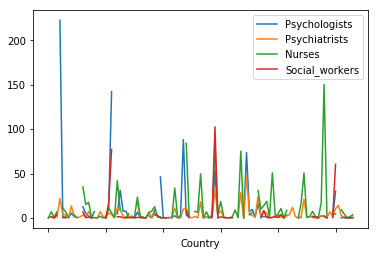

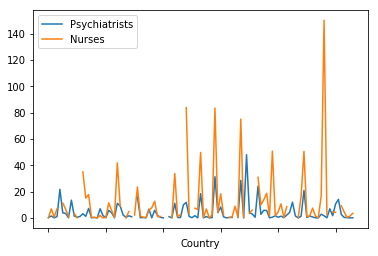

In [13]:
df_human_resources = spark.read.csv('./Datasets/Human Resources.csv', header='true')
df_human_resources = df_human_resources.withColumn(
    "Psychologists",
    col("Psychologists").cast("float")
).withColumn(
    "Psychiatrists",
    col("Psychiatrists").cast("float")
).withColumn(
    "Nurses",
    col("Nurses").cast("float")
).withColumn(
    "Social_workers",
    col("Social_workers").cast("float")
)
df_human_resources.show()
df_human_resources.printSchema()

df_human_resources_pandas = df_human_resources.toPandas()
print(df_human_resources_pandas.describe())
df_human_resources_pandas.plot(
    kind="line",
    x="Country",
    y=[
        "Psychologists",
        "Psychiatrists",
        "Nurses",
        "Social_workers"
    ]
)

df_human_resources_pandas.plot(
    kind="line",
    x="Country",
    y=[
        "Psychiatrists",
        "Nurses"
    ]
)

### 2.3.6

+-----------+-----------+----+----+----+----+-----------+---------+-------+--------+--------+-------+-------+-------+-------+----+-----------------+------------+----------------------+--------------+----------------------+------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----------------------+----------------+----+-------------+------+--------------+-------------+
|    Country|        Sex|2016|2015|2010|2000|        Sex| 80_above| 70to79| 60to69 | 50to59 | 40to49| 30to39| 20to29| 10to19|Year|Mental _hospitals|health_units|outpatient _facilities|day _treatment|residential_facilities|Country Code|GDP_PerCapita_2000 US$|SuicideRate_2000|GDP_PerCapita_2005 US$|SuicideRate_2005|GDP_PerCapita_2010 US$|SuicideRate_2010|GDP_PerCapita_2015 US$|SuicideRate_2015|GDP_PerCapita_2016 US$|SuicideRate_2016|Year|Psychiatrists|Nurses|Social_workers|Psychologists|
+-----------+-----

root
 |-- Country: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- 2016: float (nullable = true)
 |-- 2015: float (nullable = true)
 |-- 2010: float (nullable = true)
 |-- 2000: float (nullable = true)
 |-- Sex: string (nullable = true)
 |--  80_above: float (nullable = true)
 |--  70to79: float (nullable = true)
 |--  60to69 : float (nullable = true)
 |--  50to59 : float (nullable = true)
 |--  40to49: float (nullable = true)
 |--  30to39: float (nullable = true)
 |--  20to29: float (nullable = true)
 |--  10to19: float (nullable = true)
 |-- Year: string (nullable = true)
 |-- Mental _hospitals: float (nullable = true)
 |-- health_units: float (nullable = true)
 |-- outpatient _facilities: float (nullable = true)
 |-- day _treatment: float (nullable = true)
 |-- residential_facilities: float (nullable = true)
 |-- Country Code: string (nullable = true)
 |-- GDP_PerCapita_2000 US$: float (nullable = true)
 |-- SuicideRate_2000: float (nullable = true)
 |-- GDP_PerCapi

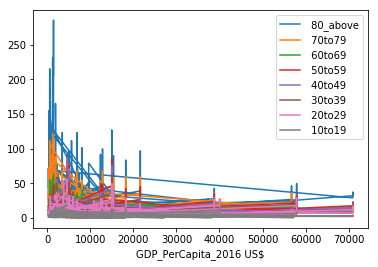

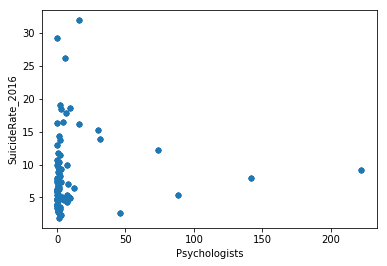

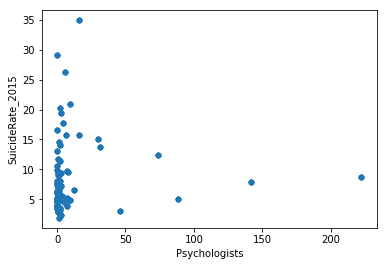

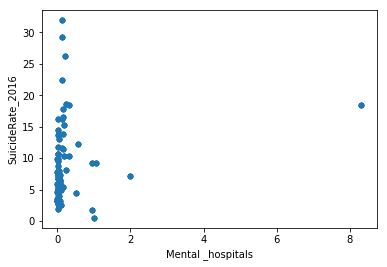

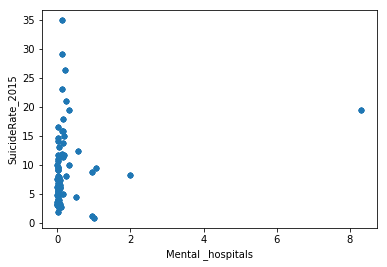

In [14]:
df_crude = spark.read.csv('./Datasets/Crude suicide rates.csv', header='true')
df_age = spark.read.csv('./Datasets/Age-standardized suicide rates.csv', header='true')
df_facilities = spark.read.csv('./Datasets/Facilities.csv', header='true')
df_gdp = spark.read.csv('./Datasets/GDP Suicide.csv', header='true')
df_hr = spark.read.csv('./Datasets/Human Resources.csv', header='true')
merged_dataset = df_crude.join(df_age, "Country", "inner")
merged_dataset = merged_dataset.join(df_facilities, "Country", "inner")
merged_dataset = merged_dataset.join(df_gdp, "Country", "inner")
merged_dataset = merged_dataset.join(df_hr, "Country", "inner")
merged_dataset.show()

merged_dataset = merged_dataset.withColumn(
    "2016",
    col("2016").cast("float")
).withColumn(
    "2015",
    col("2015").cast("float")
).withColumn(
    "2010",
    col("2010").cast("float")
).withColumn(
    "2000",
    col("2000").cast("float")
).withColumn(
    " 80_above",
    col(" 80_above").cast("float")
).withColumn(
    " 70to79",
    col(" 70to79").cast("float")
).withColumn(
    " 60to69 ",
    col(" 60to69 ").cast("float")
).withColumn(
    " 50to59 ",
    col(" 50to59 ").cast("float")
).withColumn(
    " 40to49",
    col(" 40to49").cast("float")
).withColumn(
    " 30to39",
    col(" 30to39").cast("float")
).withColumn(
    " 20to29",
    col(" 20to29").cast("float")
).withColumn(
    " 10to19",
    col(" 10to19").cast("float")
).withColumn(
    "Mental _hospitals",
    col("Mental _hospitals").cast("float")
).withColumn(
    "health_units",
    col("health_units").cast("float")
).withColumn(
    "outpatient _facilities",
    col("outpatient _facilities").cast("float")
).withColumn(
    "day _treatment",
    col("day _treatment").cast("float")
).withColumn(
    "residential_facilities",
    col("residential_facilities").cast("float")
).withColumn(
    "Country Code",
    col("Country Code").cast("string")
).withColumn(
    "GDP_PerCapita_2000 US$",
    col("GDP_PerCapita_2000 US$").cast("float")
).withColumn(
    "SuicideRate_2000",
    col("SuicideRate_2000").cast("float")
).withColumn(
    "GDP_PerCapita_2005 US$",
    col("GDP_PerCapita_2005 US$").cast("float")
).withColumn(
    "SuicideRate_2005",
    col("SuicideRate_2005").cast("float")
).withColumn(
    "GDP_PerCapita_2010 US$",
    col("GDP_PerCapita_2010 US$").cast("float")
).withColumn(
    "SuicideRate_2010",
    col("2010").cast("float")
).withColumn(
    "GDP_PerCapita_2015 US$",
    col("GDP_PerCapita_2015 US$").cast("float")
).withColumn(
    "SuicideRate_2015",
    col("SuicideRate_2015").cast("float")
).withColumn(
    "GDP_PerCapita_2016 US$",
    col("GDP_PerCapita_2016 US$").cast("float")
).withColumn(
    "SuicideRate_2016",
    col("SuicideRate_2016").cast("float")
).withColumn(
    "Psychiatrists",
    col("Psychiatrists").cast("float")
).withColumn(
    "Nurses",
    col("Nurses").cast("float")
).withColumn(
    "Social_workers",
    col("Social_workers").cast("float")
).withColumn(
    "Psychologists",
    col("Psychologists").cast("float")
)

merged_dataset.printSchema()
merged_dataset_pandas = merged_dataset.toPandas()
with pd.option_context('display.max_columns', 2000):
     print(merged_dataset_pandas.describe())


merged_dataset_pandas.plot(
    kind="line",
    x="GDP_PerCapita_2016 US$",
    y=[
        " 80_above",
        " 70to79",
        " 60to69 ",
        " 50to59 ",
        " 40to49",
        " 30to39",
        " 20to29",
        " 10to19",
    ]
)

merged_dataset_pandas.plot(
    kind="scatter",
    x="Psychologists",
    y="SuicideRate_2016"
)

merged_dataset_pandas.plot(
    kind="scatter",
    x="Psychologists",
    y="SuicideRate_2015"
)

merged_dataset_pandas.plot(
    kind="scatter",
    x="Mental _hospitals",
    y="SuicideRate_2016"
)

merged_dataset_pandas.plot(
    kind="scatter",
    x="Mental _hospitals",
    y="SuicideRate_2015"
)


### 2.4.1

----------------Null values----------------


,0
Country,0
Country Code,0
GDP_PerCapita_2000 US$,5
SuicideRate_2000,0
GDP_PerCapita_2005 US$,2
SuicideRate_2005,0
GDP_PerCapita_2010 US$,2
SuicideRate_2010,0
GDP_PerCapita_2015 US$,2
SuicideRate_2015,0


----------------End----------------


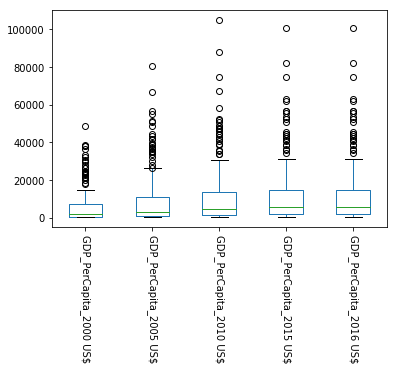

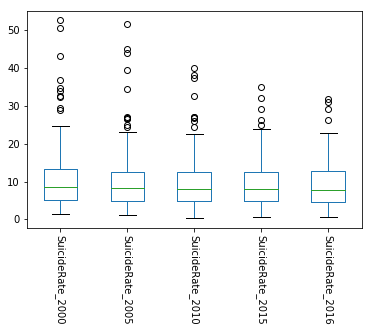

In [15]:
df_gdp_suicide = spark.read.csv('./Datasets/GDP Suicide.csv', header='true')
display_null_values(df_gdp_suicide)
df_gdp_suicide = df_gdp_suicide.withColumn(
    'GDP_PerCapita_2000 US$',
    col('GDP_PerCapita_2000 US$').cast('float')
).withColumn(
    'GDP_PerCapita_2005 US$',
    col('GDP_PerCapita_2005 US$').cast('float')
).withColumn(
    'GDP_PerCapita_2010 US$',
    col('GDP_PerCapita_2010 US$').cast("float")
).withColumn(
    'GDP_PerCapita_2015 US$',
    col('GDP_PerCapita_2015 US$').cast('float')
).withColumn(
    'GDP_PerCapita_2016 US$',
    col('GDP_PerCapita_2015 US$').cast('float')
).withColumn(
    'SuicideRate_2000',
    col('SuicideRate_2000').cast('float')
).withColumn(
    'SuicideRate_2005',
    col('SuicideRate_2005').cast('float')
).withColumn(
    'SuicideRate_2010',
    col('SuicideRate_2010').cast('float')
).withColumn(
    'SuicideRate_2015',
    col('SuicideRate_2015').cast('float')
).withColumn(
    'SuicideRate_2016',
    col('SuicideRate_2016').cast('float')
)
df_gdp_suicide.filter(isnull(df_gdp_suicide["GDP_PerCapita_2016 US$"]))

df_gdp_suicide_pandas = df_gdp_suicide.toPandas()

df_gdp_suicide_pandas.plot(
    kind="box",
    x="Country",
    y=[
        'GDP_PerCapita_2000 US$',
        'GDP_PerCapita_2005 US$',
        'GDP_PerCapita_2010 US$',
        'GDP_PerCapita_2015 US$',
        'GDP_PerCapita_2016 US$'
    ],
    rot=-90
)

df_gdp_suicide_pandas.plot(
    kind="box",
    x="Country",
    y=[
        'SuicideRate_2000',
        'SuicideRate_2005',
        'SuicideRate_2010',
        'SuicideRate_2015',
        'SuicideRate_2016'
    ],
    rot=-90
)



### 2.4.2

----------------Null values----------------


,0
Country,0
Sex,0
80_above,0
70to79,0
60to69,0
50to59,0
40to49,0
30to39,0
20to29,0
10to19,0


----------------End----------------
+--------------------+-----+---------+-------+--------+--------+-------+-------+-------+-------+
|             Country|  Sex| 80_above| 70to79| 60to69 | 50to59 | 40to49| 30to39| 20to29| 10to19|
+--------------------+-----+---------+-------+--------+--------+-------+-------+-------+-------+
|         Afghanistan| Male|     70.4|   20.9|     9.8|     9.3|   10.5|   15.1|   16.3|    4.8|
|             Albania| Male|     23.2|   11.9|     8.1|    11.4|   13.5|    8.8|    6.3|    3.1|
|             Algeria| Male|     12.7|    8.4|     6.2|     6.2|      7|    7.9|    6.2|    1.6|
|              Angola| Male|    123.2|   68.2|    34.7|    21.8|   10.7|    8.4|   10.4|    3.8|
| Antigua and Barbuda| Male|        0|      0|       0|       0|      0|      0|      0|      0|
|           Argentina| Male|     41.6|   22.7|    17.2|    15.1|   15.5|   17.8|   25.3|   12.7|
|             Armenia| Male|       41|   28.1|    17.8|    15.9|   17.2|   10.1|    8.2|   

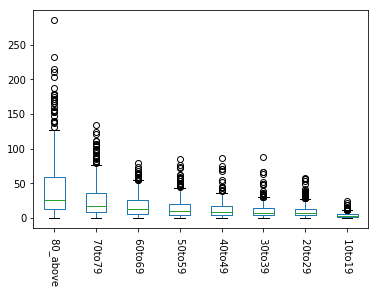

In [16]:
df_suicide_rate_age = spark.read.csv(
    './Datasets/Age-standardized suicide rates.csv', 
    header='true'
)
display_null_values(df_suicide_rate_age)
df_suicide_rate_age_males = df_suicide_rate_age \
    .filter(df_suicide_rate_age["Sex"] == " Male")
df_suicide_rate_age_females = df_suicide_rate_age \
    .filter(df_suicide_rate_age["Sex"] == " Female")
df_suicide_rate_age_both_sexes = df_suicide_rate_age_males \
    .union(df_suicide_rate_age_females)
df_suicide_rate_age_both_sexes.show()
df_suicide_rate_age_both_sexes = df_suicide_rate_age_both_sexes.withColumn(
    ' 80_above',
    col(' 80_above').cast("float")
).withColumn(
    ' 70to79',
    col(' 70to79').cast("float")
).withColumn(
    ' 60to69 ',
    col(' 60to69 ').cast("float")
).withColumn(
    ' 50to59 ',
    col(' 50to59 ').cast("float")
).withColumn(
    ' 40to49',
    col(' 40to49').cast("float")
).withColumn(
    ' 30to39',
    col(' 30to39').cast("float")
).withColumn(
    ' 20to29',
    col(' 20to29').cast("float")
).withColumn(
    ' 10to19',
    col(' 10to19').cast("float")
)
df_suicide_rate_age_both_sexes.printSchema()
df_suicide_rate_age_both_sexes.show()

df_suicide_rate_age_both_sexes_pandas = df_suicide_rate_age_both_sexes.toPandas()
df_suicide_rate_age_both_sexes_pandas.info()
df_suicide_rate_age_both_sexes_pandas.plot(
    kind="box",
    x="Sex",
    y=[
        ' 80_above',
        ' 70to79',
        ' 60to69 ',
        ' 50to59 ',
        ' 40to49',
        ' 30to39',
        ' 20to29',
        ' 10to19'
    ],
    rot=-90
)

### 2.4.3

----------------Null values----------------


,0
Country,0
Sex,0
2016,0
2015,0
2010,0
2000,0


----------------End----------------
root
 |-- Country: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- 2016: float (nullable = true)
 |-- 2015: float (nullable = true)
 |-- 2010: float (nullable = true)
 |-- 2000: float (nullable = true)

+-------------------+-----------+----+----+----+----+
|            Country|        Sex|2016|2015|2010|2000|
+-------------------+-----------+----+----+----+----+
|        Afghanistan| Both sexes| 6.4| 6.6| 7.4| 8.1|
|        Afghanistan|       Male|10.6|10.9|12.5|14.3|
|        Afghanistan|     Female| 2.1| 2.1| 2.1| 1.7|
|            Albania| Both sexes| 5.6| 5.3| 7.7| 5.8|
|            Albania|       Male| 7.0| 6.7| 9.5| 8.2|
|            Albania|     Female| 4.3| 4.0| 6.0| 3.6|
|            Algeria| Both sexes| 3.3| 3.4| 3.5| 4.7|
|            Algeria|       Male| 4.9| 5.0| 5.1| 6.7|
|            Algeria|     Female| 1.8| 1.8| 1.9| 2.8|
|             Angola| Both sexes| 8.9| 9.3|10.4|13.9|
|             Angola|       Male|14.0|14.8

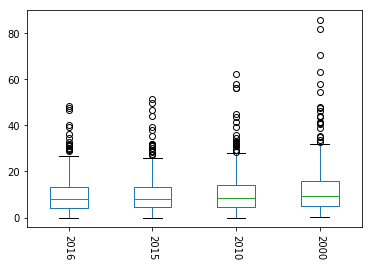

In [17]:
df_crude_suicide_rate = spark.read.csv('./Datasets/Crude suicide rates.csv', header='true')
display_null_values(df_crude_suicide_rate)
df_crude_suicide_rate = df_crude_suicide_rate.withColumn(
    "2016",
    col("2016").cast("float")
).withColumn(
    "2015",
    col("2015").cast("float")
).withColumn(
    "2010",
    col("2010").cast("float")
).withColumn(
    "2000",
    col("2000").cast("float")
)
df_crude_suicide_rate.printSchema()
df_crude_suicide_rate.show()

df_crude_suicide_rate_pandas = df_crude_suicide_rate.toPandas()
df_crude_suicide_rate_pandas.plot(
    kind="box",
    x="Country",
    y=[
        '2016',
        '2015',
        '2010',
        '2000'
    ],
    rot=-90
)


### 2.4.4

----------------Null values----------------


,0
Country,0
Year,0
Mental _hospitals,22
health_units,10
outpatient _facilities,12
day _treatment,61
residential_facilities,67


----------------End----------------
root
 |-- Country: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Mental _hospitals: float (nullable = true)
 |-- health_units: float (nullable = true)
 |-- outpatient _facilities: float (nullable = true)
 |-- day _treatment: float (nullable = true)
 |-- residential_facilities: float (nullable = true)

+--------------------+----+-----------------+------------+----------------------+--------------+----------------------+
|             Country|Year|Mental _hospitals|health_units|outpatient _facilities|day _treatment|residential_facilities|
+--------------------+----+-----------------+------------+----------------------+--------------+----------------------+
|         Afghanistan|2016|            0.003|       0.012|                 0.006|          null|                  null|
|             Albania|2016|            0.068|       0.068|                  0.41|          null|                 0.445|
|             Algeria|2016|            0.

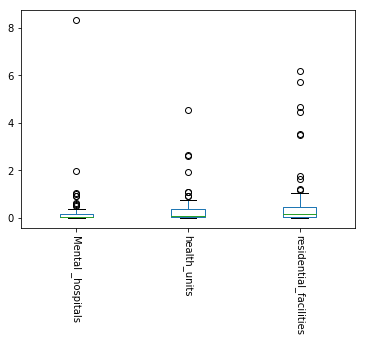

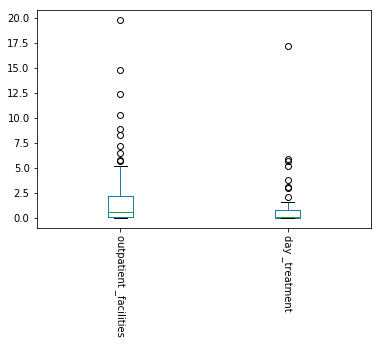

In [18]:
df_facilities = spark.read.csv('./Datasets/Facilities.csv', header='true')
display_null_values(df_facilities)
df_facilities = df_facilities.withColumn(
    "Mental _hospitals",
    col("Mental _hospitals").cast("float")
).withColumn(
    "health_units",
    col("health_units").cast("float")
).withColumn(
    "outpatient _facilities",
    col("outpatient _facilities").cast("float")
).withColumn(
    "day _treatment",
    col("day _treatment").cast("float")
).withColumn(
    "residential_facilities",
    col("residential_facilities").cast("float")
)
df_facilities.printSchema()
df_facilities.show()

df_facilities_pandas = df_facilities.toPandas()
df_facilities_pandas.plot(
    kind="box",
    x="Country",
    y=[
        "Mental _hospitals",
        "health_units",
        "residential_facilities"
    ],
    rot=-90
)

df_facilities_pandas.plot(
    kind="box",
    x="Country",
    y=[
        "outpatient _facilities",
        "day _treatment",
    ],
    rot=-90
)


### 2.4.5

----------------Null values----------------


,0
Country,0
Year,0
Psychiatrists,3
Nurses,16
Social_workers,39
Psychologists,23


----------------End----------------
root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Psychiatrists: float (nullable = true)
 |-- Nurses: float (nullable = true)
 |-- Social_workers: float (nullable = true)
 |-- Psychologists: float (nullable = true)

+--------------------+----+-------------+------+--------------+-------------+
|             Country|Year|Psychiatrists|Nurses|Social_workers|Psychologists|
+--------------------+----+-------------+------+--------------+-------------+
|         Afghanistan|2016|        0.231| 0.098|          null|        0.296|
|             Albania|2016|        1.471| 6.876|          1.06|        1.231|
|              Angola|2016|        0.057|  0.66|         0.022|        0.179|
| Antigua and Barbuda|2016|        1.001| 7.005|         4.003|         null|
|           Argentina|2016|       21.705|  null|          null|      222.572|
|             Armenia|2016|         3.84|11.245|         0.274|        0.788|
|         

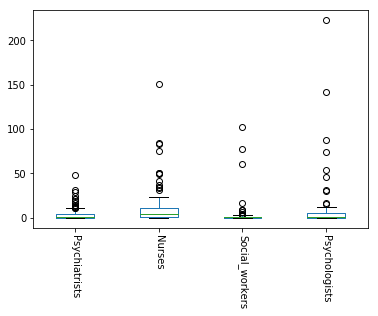

In [19]:
df_human_resources = spark.read.csv('./Datasets/Human Resources.csv', header='true')
display_null_values(df_human_resources)
df_human_resources = df_human_resources.withColumn(
    "Psychiatrists",
    col("Psychiatrists").cast("float")
).withColumn(
    "Nurses",
    col("Nurses").cast("float")
).withColumn(
    "Social_workers",
    col("Social_workers").cast("float")
).withColumn(
    "Psychologists",
    col("Psychologists").cast("float")
).withColumn(
    "Year",
    col("Year").cast("integer")
)
df_human_resources.printSchema()
df_human_resources.show()

df_human_resources_pandas = df_human_resources.toPandas()
print(df_human_resources_pandas)

df_human_resources_pandas.plot(
    kind="box",
    x="Country",
    y=[
        "Psychiatrists",
        "Nurses",
        "Social_workers",
        "Psychologists"
    ],
    rot=-90
)

### 2.4.6

In [20]:
df_crude = spark.read.csv('./Datasets/Crude suicide rates.csv', header='true')
df_age = spark.read.csv('./Datasets/Age-standardized suicide rates.csv', header='true')
df_facilities = spark.read.csv('./Datasets/Facilities.csv', header='true')
df_gdp = spark.read.csv('./Datasets/GDP Suicide.csv', header='true')
df_hr = spark.read.csv('./Datasets/Human Resources.csv', header='true')
merged_dataset = df_crude.join(df_age, "Country")
merged_dataset = merged_dataset.join(df_facilities, "Country")
merged_dataset = merged_dataset.join(df_gdp, "Country")
merged_dataset = merged_dataset.join(df_hr, "Country")
merged_dataset = merged_dataset.withColumn(
    "2016", col("2016").cast("float")
).withColumn(
    "2015", col("2015").cast("float")
).withColumn(
    "2010", col("2010").cast("float")
).withColumn(
    "2000", col("2000").cast("float")
).withColumn(
    " 80_above", col(" 80_above").cast("float")
).withColumn(
    " 70to79", col(" 70to79").cast("float")
).withColumn(
    " 60to69 ", col(" 60to69 ").cast("float")
).withColumn(
    " 50to59 ", col(" 50to59 ").cast("float")
).withColumn(
    " 40to49", col(" 40to49").cast("float")
).withColumn(
    " 30to39", col(" 30to39").cast("float")
).withColumn(
    " 20to29", col(" 20to29").cast("float")
).withColumn(
    " 10to19", col(" 10to19").cast("float")
).withColumn(
    "Mental _hospitals", col("Mental _hospitals").cast("float")
).withColumn(
    "health_units", col("health_units").cast("float")
).withColumn(
    "outpatient _facilities", col("outpatient _facilities").cast("float")
).withColumn(
    "day _treatment", col("day _treatment").cast("float")
).withColumn(
    "residential_facilities", col("residential_facilities").cast("float")
).withColumn(
    "GDP_PerCapita_2000 US$", col("GDP_PerCapita_2000 US$").cast("float")
).withColumn(
    "GDP_PerCapita_2005 US$", col("GDP_PerCapita_2005 US$").cast("float")
).withColumn(
    "GDP_PerCapita_2010 US$", col("GDP_PerCapita_2010 US$").cast("float")
).withColumn(
    "GDP_PerCapita_2015 US$", col("GDP_PerCapita_2015 US$").cast("float")
).withColumn(
    "GDP_PerCapita_2016 US$", col("GDP_PerCapita_2016 US$").cast("float")
).withColumn(
    "SuicideRate_2000", col("SuicideRate_2000").cast("float")
).withColumn(
    "SuicideRate_2005", col("SuicideRate_2005").cast("float")
).withColumn(
    "SuicideRate_2010", col("SuicideRate_2010").cast("float")
).withColumn(
    "SuicideRate_2015", col("SuicideRate_2015").cast("float")
).withColumn(
    "SuicideRate_2016", col("SuicideRate_2016").cast("float")
).withColumn(
    "Psychiatrists", col("Psychiatrists").cast("float")
).withColumn(
    "Nurses", col("Nurses").cast("float")
).withColumn(
    "Social_workers", col("Social_workers").cast("float")
).withColumn(
    "Psychologists", col("Psychologists").cast("float")
)
merged_dataset.printSchema()
merged_dataset = merged_dataset.select(
    "2016", "2015", "2010", "2000", " 80_above", " 70to79", " 60to69 ", " 50to59 ",
    " 40to49", " 30to39", " 20to29", " 10to19", "Mental _hospitals", "health_units",
    "outpatient _facilities", "day _treatment", "residential_facilities", "GDP_PerCapita_2000 US$",
    "GDP_PerCapita_2005 US$", "GDP_PerCapita_2010 US$", "GDP_PerCapita_2015 US$", "GDP_PerCapita_2016 US$",
    "SuicideRate_2000", "SuicideRate_2005", "SuicideRate_2010", "SuicideRate_2015", "SuicideRate_2016",
    "Psychiatrists", "Nurses", "Social_workers", "Psychologists"
)
display_null_values(merged_dataset)

merged_dataset_pandas = merged_dataset.toPandas()
merged_dataset_pandas.head()

root
 |-- Country: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- 2016: float (nullable = true)
 |-- 2015: float (nullable = true)
 |-- 2010: float (nullable = true)
 |-- 2000: float (nullable = true)
 |-- Sex: string (nullable = true)
 |--  80_above: float (nullable = true)
 |--  70to79: float (nullable = true)
 |--  60to69 : float (nullable = true)
 |--  50to59 : float (nullable = true)
 |--  40to49: float (nullable = true)
 |--  30to39: float (nullable = true)
 |--  20to29: float (nullable = true)
 |--  10to19: float (nullable = true)
 |-- Year: string (nullable = true)
 |-- Mental _hospitals: float (nullable = true)
 |-- health_units: float (nullable = true)
 |-- outpatient _facilities: float (nullable = true)
 |-- day _treatment: float (nullable = true)
 |-- residential_facilities: float (nullable = true)
 |-- Country Code: string (nullable = true)
 |-- GDP_PerCapita_2000 US$: float (nullable = true)
 |-- SuicideRate_2000: float (nullable = true)
 |-- GDP_PerCapi

,0
2016,0
2015,0
2010,0
2000,0
80_above,0
70to79,0
60to69,0
50to59,0
40to49,0
30to39,0


----------------End----------------


,2016,2015,2010,2000,80_above,70to79,60to69,50to59,40to49,30to39,...,GDP_PerCapita_2016 US$,SuicideRate_2000,SuicideRate_2005,SuicideRate_2010,SuicideRate_2015,SuicideRate_2016,Psychiatrists,Nurses,Social_workers,Psychologists
0,6.4,6.6,7.4,8.1,20.100000,2.3,1.4,1.6,2.3,2.7,...,547.228088,5.7,6.3,5.1,4.8,4.7,0.231,0.098,NaN,0.296
1,6.4,6.6,7.4,8.1,70.400002,20.9,9.8,9.3,10.5,15.1,...,547.228088,5.7,6.3,5.1,4.8,4.7,0.231,0.098,NaN,0.296
2,6.4,6.6,7.4,8.1,42.000000,11.0,5.5,5.6,6.6,9.2,...,547.228088,5.7,6.3,5.1,4.8,4.7,0.231,0.098,NaN,0.296
3,10.6,10.9,12.5,14.3,20.100000,2.3,1.4,1.6,2.3,2.7,...,547.228088,5.7,6.3,5.1,4.8,4.7,0.231,0.098,NaN,0.296
4,10.6,10.9,12.5,14.3,70.400002,20.9,9.8,9.3,10.5,15.1,...,547.228088,5.7,6.3,5.1,4.8,4.7,0.231,0.098,NaN,0.296


### 3

In [21]:
df_facilities = spark.read.csv('./Datasets/Facilities.csv', header='true')
df_facilities = df_facilities.drop("Year")

# Update column data type
df_facilities = df_facilities.withColumn(
    "Mental _hospitals",
    col("Mental _hospitals").cast("float")
).withColumn(
    "health_units",
    col("health_units").cast("float")
).withColumn(
    "outpatient _facilities",
    col("outpatient _facilities").cast("float")
).withColumn(
    "day _treatment",
    col("day _treatment").cast("float")
).withColumn(
    "residential_facilities",
    col("residential_facilities").cast("float")
)

# Update column names
df_facilities = df_facilities.selectExpr(
    "`Country` as `Country`",
    "`health_units` as `health_units`",
    "`Mental _hospitals` as `Mental_hospitals`",
    "`outpatient _facilities` as `outpatient_facilities`",
    "`day _treatment` as `day_treatment`",
    "`residential_facilities` as `residential_facilities`",
)

## Fix null values start
# (optionally to comment out in order to show)
df_facilities_means = df_facilities.select(
    mean(col("health_units")).alias('health_units_mean'),
    mean(col("Mental_hospitals")).alias('Mental_hospitals_mean'),
    mean(col("outpatient_facilities")).alias('outpatient_facilities_mean'),
    mean(col("day_treatment")).alias('day_treatment_mean'),
    mean(col("residential_facilities")).alias('residential_facilities_mean'),
).collect()

health_units_mean = df_facilities_means[0]['health_units_mean']
mental_hospitals_mean = df_facilities_means[0]['Mental_hospitals_mean']
outpatient_facilities_mean = df_facilities_means[0]['outpatient_facilities_mean']
day_treatment_mean = df_facilities_means[0]['day_treatment_mean']
residential_facilities_mean = df_facilities_means[0]['residential_facilities_mean']

df_facilities = df_facilities.na.fill(health_units_mean, ["health_units"]) \
.na.fill(mental_hospitals_mean, ["mental_hospitals"]) \
.na.fill(outpatient_facilities_mean, ["outpatient_facilities"]) \
.na.fill(day_treatment_mean, ["day_treatment"]) \
.na.fill(residential_facilities_mean, ["residential_facilities"])
df_facilities.show()
## Fix null values end

# Show null values
display_null_values(df_facilities)

# Show schema
df_facilities.printSchema()
df_facilities.show()

df_facilities_pandas = df_facilities.toPandas()
df_facilities_pandas.head()

+--------------------+------------+----------------+---------------------+-------------+----------------------+
|             Country|health_units|Mental_hospitals|outpatient_facilities|day_treatment|residential_facilities|
+--------------------+------------+----------------+---------------------+-------------+----------------------+
|         Afghanistan|       0.012|           0.003|                0.006|    1.1348039|             0.8733111|
|             Albania|       0.068|           0.068|                 0.41|    1.1348039|                 0.445|
|             Algeria|       0.068|           0.048|                0.048|    1.1348039|             0.8733111|
|              Angola|  0.31907842|           0.011|            1.8751299|    1.1348039|                 0.014|
| Antigua and Barbuda|  0.31907842|           1.001|            1.8751299|    1.1348039|             0.8733111|
|           Argentina|       1.071|           0.937|                 1.72|    1.1348039|                

,0
Country,0
health_units,0
Mental_hospitals,0
outpatient_facilities,0
day_treatment,0
residential_facilities,0


----------------End----------------
root
 |-- Country: string (nullable = true)
 |-- health_units: float (nullable = false)
 |-- Mental_hospitals: float (nullable = false)
 |-- outpatient_facilities: float (nullable = false)
 |-- day_treatment: float (nullable = false)
 |-- residential_facilities: float (nullable = false)

+--------------------+------------+----------------+---------------------+-------------+----------------------+
|             Country|health_units|Mental_hospitals|outpatient_facilities|day_treatment|residential_facilities|
+--------------------+------------+----------------+---------------------+-------------+----------------------+
|         Afghanistan|       0.012|           0.003|                0.006|    1.1348039|             0.8733111|
|             Albania|       0.068|           0.068|                 0.41|    1.1348039|                 0.445|
|             Algeria|       0.068|           0.048|                0.048|    1.1348039|             0.8733111|
|  

,Country,health_units,Mental_hospitals,outpatient_facilities,day_treatment,residential_facilities
0,Afghanistan,0.012000,0.003,0.00600,1.134804,0.873311
1,Albania,0.068000,0.068,0.41000,1.134804,0.445000
2,Algeria,0.068000,0.048,0.04800,1.134804,0.873311
3,Angola,0.319078,0.011,1.87513,1.134804,0.014000
4,Antigua and Barbuda,0.319078,1.001,1.87513,1.134804,0.873311


In [22]:
df_age_standard_suicide_rate = spark.read.csv(
    './Datasets/Age-standardized suicide rates.csv', 
    header='true'
)
df_age_standard_suicide_rate.printSchema()

# Update column names
df_age_standard_suicide_rate = df_age_standard_suicide_rate.selectExpr(
    "`Country` as `Country`",
    "`Sex` as `Sex`",
    "` 80_above` as `80_above`",
    "` 70to79` as `70to79`",
    "` 60to69 ` as `60to69`",
    "` 50to59 ` as `50to59`",
    "` 40to49` as `40to49`",
    "` 30to39` as `30to39`",
    "` 20to29` as `20to29`",
    "` 10to19` as `10to19`"
)

# Update column data type
df_age_standard_suicide_rate = df_age_standard_suicide_rate.withColumn(
    "Sex",
    trim(col("Sex"))
).withColumn(
    "80_above",
    col("80_above").cast("float")
).withColumn(
    "70to79",
    col("70to79").cast("float")
).withColumn(
    "60to69",
    col("60to69").cast("float")
).withColumn(
    "50to59",
    col("50to59").cast("float")
).withColumn(
    "40to49",
    col("40to49").cast("float")
).withColumn(
    "30to39",
    col("30to39").cast("float")
).withColumn(
    "20to29",
    col("20to29").cast("float")
).withColumn(
    "10to19",
    col("10to19").cast("float")
)

df_age_standard_suicide_rate.printSchema()

# Only consider both sexes
df_age_standard_suicide_rate = df_age_standard_suicide_rate.filter(df_age_standard_suicide_rate.Sex == "Both sexes")
df_age_standard_suicide_rate.show()
df_age_standard_suicide_rate.printSchema()

# Show null values
display_null_values(df_age_standard_suicide_rate)

# choose only both sexes rows
df_age_standard_suicide_rate_pandas = df_age_standard_suicide_rate.toPandas()
df_age_standard_suicide_rate_pandas.info()

root
 |-- Country: string (nullable = true)
 |-- Sex: string (nullable = true)
 |--  80_above: string (nullable = true)
 |--  70to79: string (nullable = true)
 |--  60to69 : string (nullable = true)
 |--  50to59 : string (nullable = true)
 |--  40to49: string (nullable = true)
 |--  30to39: string (nullable = true)
 |--  20to29: string (nullable = true)
 |--  10to19: string (nullable = true)

root
 |-- Country: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- 80_above: float (nullable = true)
 |-- 70to79: float (nullable = true)
 |-- 60to69: float (nullable = true)
 |-- 50to59: float (nullable = true)
 |-- 40to49: float (nullable = true)
 |-- 30to39: float (nullable = true)
 |-- 20to29: float (nullable = true)
 |-- 10to19: float (nullable = true)

+--------------------+----------+--------+------+------+------+------+------+------+------+
|             Country|       Sex|80_above|70to79|60to69|50to59|40to49|30to39|20to29|10to19|
+--------------------+----------+--------+

,0
Country,0
Sex,0
80_above,0
70to79,0
60to69,0
50to59,0
40to49,0
30to39,0
20to29,0
10to19,0


----------------End----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
Country     183 non-null object
Sex         183 non-null object
80_above    183 non-null float64
70to79      183 non-null float64
60to69      183 non-null float64
50to59      183 non-null float64
40to49      183 non-null float64
30to39      183 non-null float64
20to29      183 non-null float64
10to19      183 non-null float64
dtypes: float64(8), object(2)
memory usage: 14.4+ KB


In [23]:
df_crude_suicide_rate = spark.read.csv("./Datasets/Crude suicide rates.csv", header=True)

# Update column data type
df_crude_suicide_rate = df_crude_suicide_rate.withColumn(
    "Sex", trim(col("Sex"))
).withColumn(
    "2016", col("2016").cast("float")
).withColumn(
    "2015", col("2015").cast("float")
).withColumn(
    "2010", col("2010").cast("float")
).withColumn(
    "2000", col("2000").cast("float")
)

# Select only both sexes
df_crude_suicide_rate_both_sexes = df_crude_suicide_rate.filter(df_crude_suicide_rate.Sex == "Both sexes")
df_crude_suicide_rate_both_sexes.show()
df_crude_suicide_rate_both_sexes.printSchema()
df_crude_suicide_rate_both_sexes = df_crude_suicide_rate_both_sexes.drop("Sex")
df_crude_suicide_rate_both_sexes.printSchema()
# Show null values
display_null_values(df_crude_suicide_rate_both_sexes)

+--------------------+----------+----+----+----+----+
|             Country|       Sex|2016|2015|2010|2000|
+--------------------+----------+----+----+----+----+
|         Afghanistan|Both sexes| 6.4| 6.6| 7.4| 8.1|
|             Albania|Both sexes| 5.6| 5.3| 7.7| 5.8|
|             Algeria|Both sexes| 3.3| 3.4| 3.5| 4.7|
|              Angola|Both sexes| 8.9| 9.3|10.4|13.9|
| Antigua and Barbuda|Both sexes| 0.5| 0.8| 0.2| 2.1|
|           Argentina|Both sexes| 9.1| 8.7| 8.6| 9.5|
|             Armenia|Both sexes| 5.7| 6.0| 5.4| 3.2|
|           Australia|Both sexes|11.7|12.2|11.0|12.2|
|             Austria|Both sexes|11.4|11.5|12.2|16.0|
|          Azerbaijan|Both sexes| 2.6| 2.7| 3.0| 2.4|
|             Bahamas|Both sexes| 1.6| 1.6| 1.9| 2.2|
|             Bahrain|Both sexes| 5.7| 5.7| 5.3| 7.3|
|          Bangladesh|Both sexes| 6.1| 6.3| 6.6| 7.0|
|            Barbados|Both sexes| 0.4| 0.4| 1.6| 2.1|
|             Belarus|Both sexes|21.4|21.2|31.9|38.7|
|             Belgium|Both s

,0
Country,0
2016,0
2015,0
2010,0
2000,0


----------------End----------------


In [24]:
df_human_resources = spark.read.csv('./Datasets/Human Resources.csv', header='true')

df_human_resources = df_human_resources.withColumn(
    "Psychiatrists",
    col("Psychiatrists").cast("float")
).withColumn(
    "Nurses",
    col("Nurses").cast("float")
).withColumn(
    "Social_workers",
    col("Social_workers").cast("float")
).withColumn(
    "Psychologists",
    col("Psychologists").cast("float")
).withColumn(
    "Year",
    col("Year").cast("integer")
)

df_human_resources.printSchema()

## Fix null values start
# (optionally to comment out in order to show)
human_resources_means = df_human_resources.select(
    mean(col("Psychiatrists")).alias('Psychiatrists_mean'),
    mean(col("Nurses")).alias('Nurses_mean'),
    mean(col("Social_workers")).alias('Social_workers_mean'),
    mean(col("Psychologists")).alias('Psychologists_mean'),
    mean(col("Year")).alias('Year_mean'),
).collect()

psychiatrists_mean = human_resources_means[0]['Psychiatrists_mean']
nurses_mean = human_resources_means[0]['Nurses_mean']
social_workers_mean = human_resources_means[0]['Social_workers_mean']
psychologists_mean = human_resources_means[0]['Psychologists_mean']
year_mean = human_resources_means[0]['Year_mean']

df_human_resources = df_human_resources.na.fill(psychiatrists_mean, ["Psychiatrists"]) \
.na.fill(nurses_mean, ["Nurses"]) \
.na.fill(social_workers_mean, ["Social_workers"]) \
.na.fill(psychologists_mean, ["Psychologists"]) \
.na.fill(year_mean, ["Year"])
## Fix null values end

df_human_resources.show()
display_null_values(df_human_resources)

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Psychiatrists: float (nullable = true)
 |-- Nurses: float (nullable = true)
 |-- Social_workers: float (nullable = true)
 |-- Psychologists: float (nullable = true)

+--------------------+----+-------------+---------+--------------+-------------+
|             Country|Year|Psychiatrists|   Nurses|Social_workers|Psychologists|
+--------------------+----+-------------+---------+--------------+-------------+
|         Afghanistan|2016|        0.231|    0.098|     4.8326325|        0.296|
|             Albania|2016|        1.471|    6.876|          1.06|        1.231|
|              Angola|2016|        0.057|     0.66|         0.022|        0.179|
| Antigua and Barbuda|2016|        1.001|    7.005|         4.003|    10.415345|
|           Argentina|2016|       21.705|12.122934|     4.8326325|      222.572|
|             Armenia|2016|         3.84|   11.245|         0.274|        0.788|
|          Azerbaij

,0
Country,0
Year,0
Psychiatrists,0
Nurses,0
Social_workers,0
Psychologists,0


----------------End----------------


#### Merge datasets as mental health
- age standard suicide rate
- crude suicide rate (both sexes)
- facilities
- human resources

In [25]:
## For the final output, drop Year
df_facilities = df_facilities.drop("Year")

df_mental_health = df_age_standard_suicide_rate \
    .join(df_crude_suicide_rate_both_sexes, ["Country"]) \
    .join(df_facilities, ["Country"]) \
    .join(df_human_resources, ["Country"])

df_mental_health.show()
df_mental_health.printSchema()

## Show difference between 2015 and 2016 as a new column
# df_mental_health = df_mental_health.withColumn(
#     "Difference between 2015 and 2016",
#     col("2015") - col("2016")
# )

display_null_values(df_mental_health)

+--------------------+----------+--------+------+------+------+------+------+------+------+----+----+----+----+------------+----------------+---------------------+-------------+----------------------+----+-------------+---------+--------------+-------------+
|             Country|       Sex|80_above|70to79|60to69|50to59|40to49|30to39|20to29|10to19|2016|2015|2010|2000|health_units|Mental_hospitals|outpatient_facilities|day_treatment|residential_facilities|Year|Psychiatrists|   Nurses|Social_workers|Psychologists|
+--------------------+----------+--------+------+------+------+------+------+------+------+----+----+----+----+------------+----------------+---------------------+-------------+----------------------+----+-------------+---------+--------------+-------------+
|         Afghanistan|Both sexes|    42.0|  11.0|   5.5|   5.6|   6.6|   9.2|  10.2|   3.1| 6.4| 6.6| 7.4| 8.1|       0.012|           0.003|                0.006|    1.1348039|             0.8733111|2016|        0.231|    

,0
Country,0
Sex,0
80_above,0
70to79,0
60to69,0
50to59,0
40to49,0
30to39,0
20to29,0
10to19,0


----------------End----------------


#### Prepare GDP suicide rate dataset

In [26]:
df_gdp_suicide_rate = spark.read.csv('./Datasets/GDP Suicide.csv', header='true')

# Drop columns
df_gdp_suicide_rate_drop_columns = [
    "Country Code",
    "GDP_PerCapita_2000 US$",
    "SuicideRate_2000",
    "GDP_PerCapita_2005 US$",
    "SuicideRate_2005",
    "GDP_PerCapita_2010 US$",
    "SuicideRate_2010",
    "GDP_PerCapita_2015 US$",
    "SuicideRate_2015",
    "SuicideRate_2016"
]
df_gdp_suicide_rate = df_gdp_suicide_rate.drop(*df_gdp_suicide_rate_drop_columns)

## Update column data type (optionally commented)
df_gdp_suicide_rate.filter(df_gdp_suicide_rate.Country == "Eritrea").show()
df_gdp_suicide_rate.filter(df_gdp_suicide_rate.Country == "Syrian Arab Republic").show()
df_gdp_suicide_rate = df_gdp_suicide_rate.withColumn(
    "GDP_PerCapita_2016 US$",
    when(col("Country") == "Eritrea", 655.42).otherwise(col("GDP_PerCapita_2016 US$"))
).withColumn(
    "GDP_PerCapita_2016 US$",
    when(df_gdp_suicide_rate.Country == "Syrian Arab Republic", 2032.6).otherwise(col("GDP_PerCapita_2016 US$"))
)

df_gdp_suicide_rate.filter(df_gdp_suicide_rate.Country == "Eritrea").show()
df_gdp_suicide_rate.filter(df_gdp_suicide_rate.Country == "Syrian Arab Republic").show()
## End

df_gdp_suicide_rate.show()
df_gdp_suicide_rate.printSchema()
display_null_values(df_gdp_suicide_rate)

+-------+----------------------+
|Country|GDP_PerCapita_2016 US$|
+-------+----------------------+
|Eritrea|                  null|
+-------+----------------------+

+--------------------+----------------------+
|             Country|GDP_PerCapita_2016 US$|
+--------------------+----------------------+
|Syrian Arab Republic|                  null|
+--------------------+----------------------+

+-------+----------------------+
|Country|GDP_PerCapita_2016 US$|
+-------+----------------------+
|Eritrea|                655.42|
+-------+----------------------+

+--------------------+----------------------+
|             Country|GDP_PerCapita_2016 US$|
+--------------------+----------------------+
|Syrian Arab Republic|                2032.6|
+--------------------+----------------------+

+--------------------+----------------------+
|             Country|GDP_PerCapita_2016 US$|
+--------------------+----------------------+
|         Afghanistan|           547.2281102|
|              Angola|

,0
Country,0
GDP_PerCapita_2016 US$,0


----------------End----------------


#### Mental health dataset drop irrelevant columns

In [27]:
columns_to_drop2 = [
    "day_treatment",
    "residential_facilities",
    "Social_workers",
## 8.2 iteration to not drop psychologists
#     "Psychologists",
    "2015",
    "2010",
    "2000"
]

df_mental_health = df_mental_health.join(df_gdp_suicide_rate, ["Country"])
df_mental_health = df_mental_health.drop(*columns_to_drop2)
df_mental_health = df_mental_health.withColumn(
    "GDP_PerCapita_2016 US$",
    col("GDP_PerCapita_2016 US$").cast("float")
)
df_mental_health.printSchema()
display_total_number_rows(df_mental_health)

display(df_mental_health.toPandas())
display_null_values(df_mental_health)

root
 |-- Country: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- 80_above: float (nullable = true)
 |-- 70to79: float (nullable = true)
 |-- 60to69: float (nullable = true)
 |-- 50to59: float (nullable = true)
 |-- 40to49: float (nullable = true)
 |-- 30to39: float (nullable = true)
 |-- 20to29: float (nullable = true)
 |-- 10to19: float (nullable = true)
 |-- 2016: float (nullable = true)
 |-- health_units: float (nullable = false)
 |-- Mental_hospitals: float (nullable = false)
 |-- outpatient_facilities: float (nullable = false)
 |-- Year: integer (nullable = true)
 |-- Psychiatrists: float (nullable = false)
 |-- Nurses: float (nullable = false)
 |-- Psychologists: float (nullable = false)
 |-- GDP_PerCapita_2016 US$: float (nullable = true)

--->Total number of rows: 93


,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19,2016,health_units,Mental_hospitals,outpatient_facilities,Year,Psychiatrists,Nurses,Psychologists,GDP_PerCapita_2016 US$
0,Afghanistan,Both sexes,42.000000,11.000000,5.500000,5.600000,6.600000,9.200000,10.2,3.1,6.4,0.012000,0.003000,0.00600,2016,0.231000,0.098000,0.296000,547.228088
1,Albania,Both sexes,16.299999,8.300000,6.000000,7.800000,9.100000,6.100000,6.5,5.0,5.6,0.068000,0.068000,0.41000,2016,1.471000,6.876000,1.231000,4124.108398
2,Angola,Both sexes,63.500000,42.099998,23.799999,14.800000,7.000000,5.400000,6.6,2.6,8.9,0.319078,0.011000,1.87513,2016,0.057000,0.660000,0.179000,3506.072998
3,Antigua and Barbuda,Both sexes,0.000000,0.000000,8.100000,0.000000,0.000000,0.000000,0.0,0.0,0.5,0.319078,1.001000,1.87513,2016,1.001000,7.005000,10.415345,15494.305664
4,Argentina,Both sexes,15.800000,11.600000,10.000000,9.500000,9.800000,10.800000,15.3,8.6,9.1,1.071000,0.937000,1.72000,2016,21.705000,12.122934,222.572006,12790.242188
5,Armenia,Both sexes,27.900000,17.400000,10.100000,8.400000,9.000000,5.400000,4.5,2.2,5.7,0.069000,0.246133,1.37100,2016,3.840000,11.245000,0.788000,3591.829346
6,Azerbaijan,Both sexes,7.700000,6.600000,4.500000,4.100000,3.500000,3.200000,2.2,1.4,2.6,0.021000,0.114000,0.15600,2016,3.452000,6.717000,1.165000,3880.738770
7,Bangladesh,Both sexes,30.000000,12.800000,7.700000,4.900000,4.600000,6.600000,9.5,6.2,6.1,0.035000,0.001000,0.05500,2016,0.130000,0.873000,0.124000,1401.620605
8,Belarus,Both sexes,40.599998,32.400002,32.000000,39.900002,39.900002,30.600000,18.9,4.8,21.4,0.063000,0.200000,0.11600,2016,13.504000,12.122934,5.514000,5022.626465
9,Belize,Both sexes,22.400000,18.000000,15.100000,10.500000,7.200000,4.000000,5.4,2.8,5.9,1.948000,0.246133,2.22700,2016,1.392000,3.340000,1.113000,4904.034180


----------------Null values----------------


,0
Country,0
Sex,0
80_above,0
70to79,0
60to69,0
50to59,0
40to49,0
30to39,0
20to29,0
10to19,0


----------------End----------------


Country                    object
Sex                        object
80_above                  float64
70to79                    float64
60to69                    float64
50to59                    float64
40to49                    float64
30to39                    float64
20to29                    float64
10to19                    float64
2016                      float64
health_units              float64
Mental_hospitals          float64
outpatient_facilities     float64
Year                        int64
Psychiatrists             float64
Nurses                    float64
Psychologists             float64
GDP_PerCapita_2016 US$    float64
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8c84a2438>]],
      dtype=object)

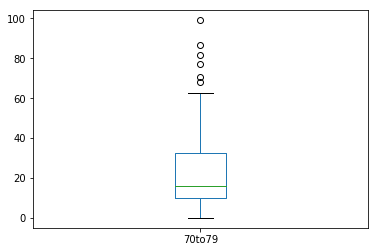

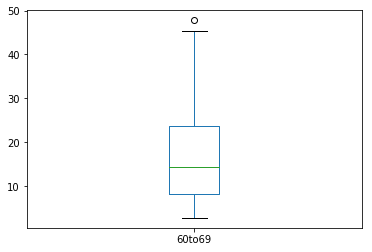

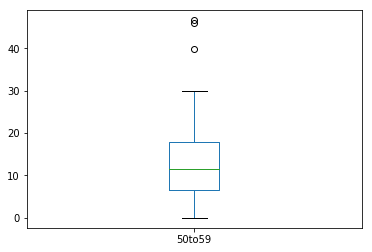

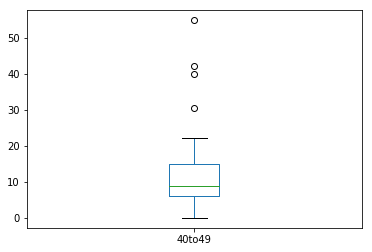

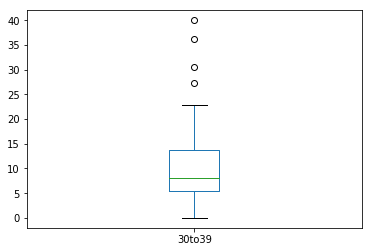

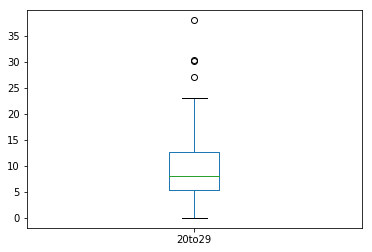

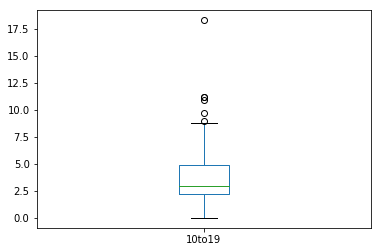

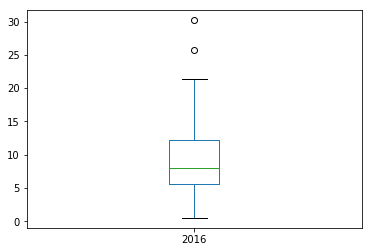

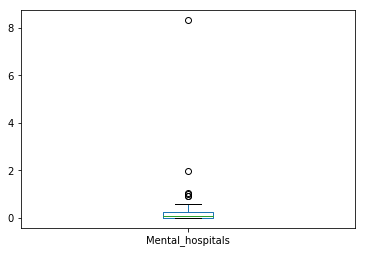

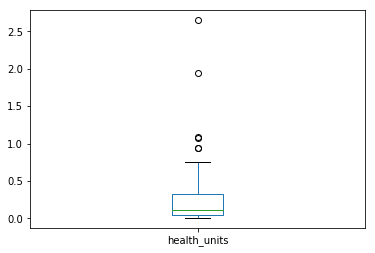

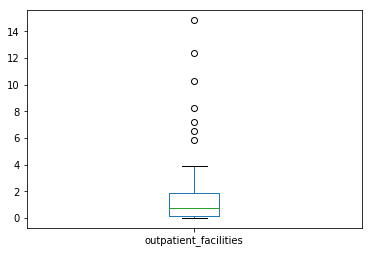

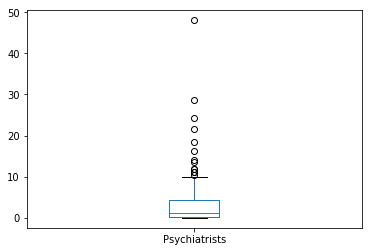

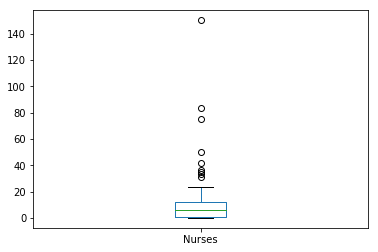

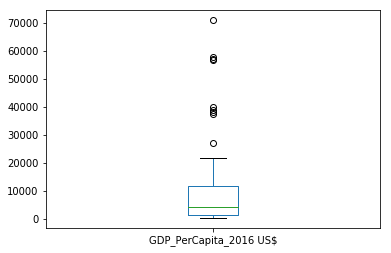

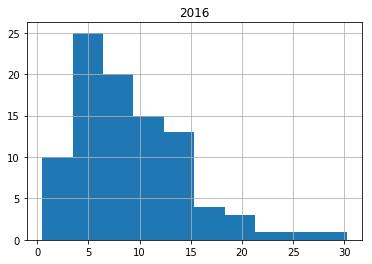

In [28]:
df_mental_health_pandas = df_mental_health.toPandas()
print(df_mental_health_pandas.dtypes)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="70to79"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="60to69"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="50to59"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="40to49"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="30to39"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="20to29"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="10to19"
)

# unused combined boxplot
# df_mental_health_pandas.plot(
#     kind="box",
#     x=None,
#     y=[
#         "80_above",
#         "70to79",
#         "60to69",
#         "50to59",
#         "40to49",
#         "30to39",
#         "20to29",
#         "10to19",
#     ]
# )

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="2016"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="Mental_hospitals"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="health_units"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="outpatient_facilities"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="Psychiatrists"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="Nurses"
)

df_mental_health_pandas.plot(
    kind="box",
    x=None,
    y="GDP_PerCapita_2016 US$"
)

df_mental_health_pandas.hist(column='2016')

In [29]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import log10
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import six

# Determine importance
dict_importance = {}
for i in df_mental_health.columns:
    if not(isinstance(df_mental_health.select(i).take(1)[0][0], six.string_types)):
        dict_importance[i] = df_mental_health.stat.corr('2016',i)
df_importance = pd.DataFrame(list(dict_importance.items()),columns = ['Label','Importance'])
df_importance = df_importance.sort_values(by="Importance", ascending=False)

# print(df_importance)
# df_importance.plot.bar(x="Label", y="Importance")

df_mental_health = df_mental_health.drop("Year")
df_mental_health = df_mental_health.drop("Sex")

## WARNING: Uncomment the below line when run section 8.
# df_mental_health = df_mental_health.drop("Country")

display_null_values(df_mental_health)
df_mental_health.printSchema()
display_total_number_rows(df_mental_health)

## reduce GDP_PerCapita_2016 US$ 
df_mental_health = df_mental_health.withColumn(
    "GDP_PerCapita_2016 US$",
    log10(col("GDP_PerCapita_2016 US$"))
)

print(df_mental_health.toPandas().describe())

input_columns = [
    "80_above",
    "70to79",
    "60to69",
    "50to59",
    "40to49",
    "30to39",
    "20to29",
    "10to19",
    "health_units",
    "Mental_hospitals",
    "outpatient_facilities",
    "Psychiatrists",
    "Psychologists",
    "Nurses",
    "GDP_PerCapita_2016 US$"    
]

assembler = VectorAssembler(inputCols=input_columns, outputCol="features")

output = assembler.transform(df_mental_health)
final_df = output.select("features", "2016")
final_df.show()

train_data, test_data = final_df.randomSplit([0.8, 0.2])
lin_reg = LinearRegression(labelCol="2016")

train_data.describe().show()
test_data.describe().show()

model = lin_reg.fit(train_data)
training_summary = model.summary
print(training_summary.featuresCol)
print("RMSE: %f" % training_summary.rootMeanSquaredError)
print("r2: %f" % training_summary.r2)

for i in range(len(input_columns)):
    print(input_columns[i] + ":  " +str(model.coefficients[i]))
    

print("Intercept: %s" % model.intercept)

res = model.evaluate(test_data)
res.residuals.show()

print("RootMeanSquaredError: " + str(res.rootMeanSquaredError))
print("MeanSquaredError: " + str(res.meanSquaredError))
print("R2: " + str(res.r2))

predictions = model.transform(test_data)
predictions.select("2016", "prediction").show()

----------------Null values----------------


,0
Country,0
80_above,0
70to79,0
60to69,0
50to59,0
40to49,0
30to39,0
20to29,0
10to19,0
2016,0


----------------End----------------
root
 |-- Country: string (nullable = true)
 |-- 80_above: float (nullable = true)
 |-- 70to79: float (nullable = true)
 |-- 60to69: float (nullable = true)
 |-- 50to59: float (nullable = true)
 |-- 40to49: float (nullable = true)
 |-- 30to39: float (nullable = true)
 |-- 20to29: float (nullable = true)
 |-- 10to19: float (nullable = true)
 |-- 2016: float (nullable = true)
 |-- health_units: float (nullable = false)
 |-- Mental_hospitals: float (nullable = false)
 |-- outpatient_facilities: float (nullable = false)
 |-- Psychiatrists: float (nullable = false)
 |-- Nurses: float (nullable = false)
 |-- Psychologists: float (nullable = false)
 |-- GDP_PerCapita_2016 US$: float (nullable = true)

--->Total number of rows: 93
         80_above     70to79     60to69     50to59     40to49     30to39  \
count   93.000000  93.000000  93.000000  93.000000  93.000000  93.000000   
mean    38.956989  24.303226  16.541935  13.745161  11.361290  10.103226   
std

### 8

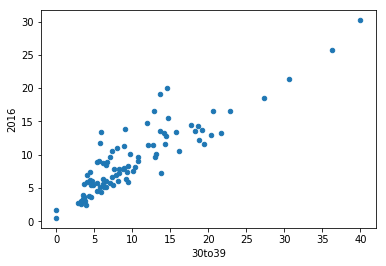

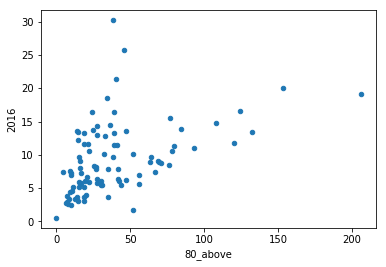

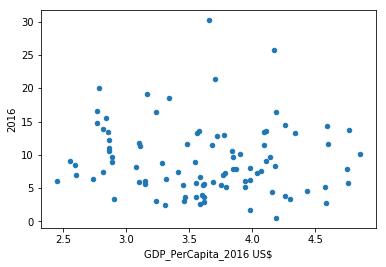

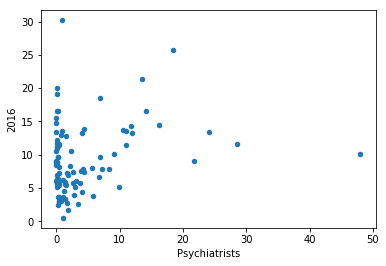

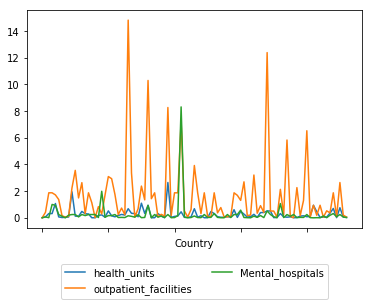

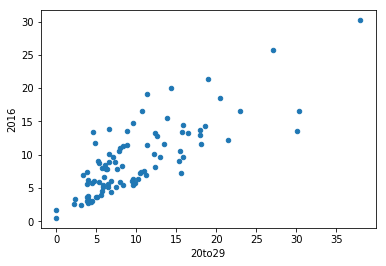

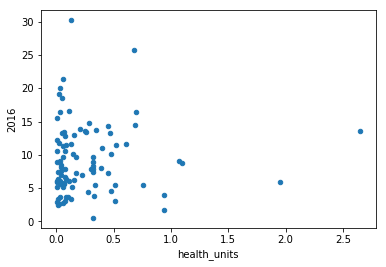

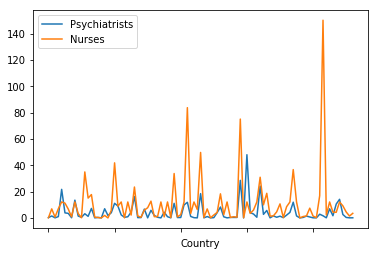

In [30]:
df_mental_health_pandas = df_mental_health.toPandas()
df_mental_health_pandas.plot(kind="scatter", x="30to39", y="2016")
df_mental_health_pandas.plot(kind="scatter", x="80_above", y="2016")

df_mental_health_pandas.plot(kind="scatter", x="GDP_PerCapita_2016 US$", y="2016")

df_mental_health_pandas.plot(kind="scatter", x="Psychiatrists", y="2016")

df_mental_health_pandas.plot(
    kind="line",
    x="Country",
    y=[
        "health_units",
        "outpatient_facilities",
        "Mental_hospitals"
    ]
)
plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.35),
    ncol=2
)

df_mental_health_pandas.plot(kind="scatter", x="20to29", y="2016")

df_mental_health_pandas.plot(kind="scatter", x="health_units", y="2016")

df_mental_health_pandas.plot(
    kind="line",
    x="Country",
    y=[
        "Psychiatrists",
        "Nurses"
    ]
)


In [31]:
# from pyspark.ml.feature import Correlation
# Correlation metrics
df_mental_health_pandas = df_mental_health.toPandas()
print(df_mental_health_pandas.corr().head())

          80_above    70to79    60to69    50to59    40to49    30to39  \
80_above  1.000000  0.934097  0.812459  0.458226  0.162241  0.058323   
70to79    0.934097  1.000000  0.918645  0.610399  0.302482  0.192132   
60to69    0.812459  0.918645  1.000000  0.824636  0.570350  0.445419   
50to59    0.458226  0.610399  0.824636  1.000000  0.908243  0.797421   
40to49    0.162241  0.302482  0.570350  0.908243  1.000000  0.941612   

            20to29    10to19      2016  health_units  Mental_hospitals  \
80_above -0.032359 -0.077392  0.465800     -0.060611         -0.081571   
70to79    0.075608  0.003517  0.595659     -0.041477         -0.049502   
60to69    0.279014  0.150420  0.780703      0.058289          0.017495   
50to59    0.608739  0.452556  0.941768      0.106452          0.083014   
40to49    0.784306  0.638039  0.915440      0.077954          0.094930   

          outpatient_facilities  Psychiatrists    Nurses  Psychologists  \
80_above              -0.056583      -0.159456 